Normal Transactions: 96.50%
Fraudulent Transactions: 3.50%


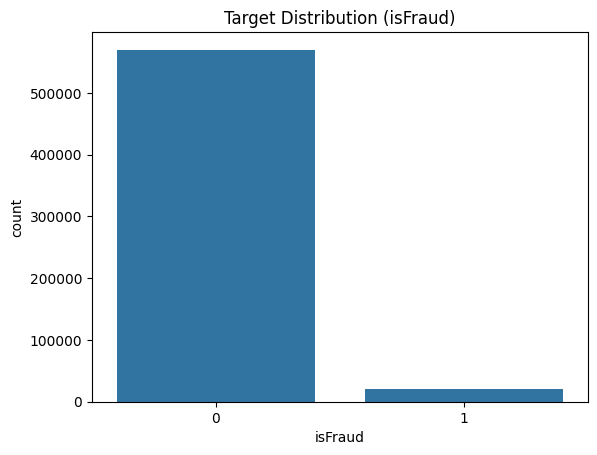

In [ ]:
# Cell 1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc

# Load engineered data
train = pd.read_parquet('../data/processed/train.parquet')

# Calculate Fraud Ratio
fraud_counts = train['isFraud'].value_counts(normalize=True)
print(f"Normal Transactions: {fraud_counts[0]*100:.2f}%")
print(f"Fraudulent Transactions: {fraud_counts[1]*100:.2f}%")

# Plotting the imbalance
sns.countplot(x='isFraud', data=train)
plt.title('Target Distribution (isFraud)')
plt.show()

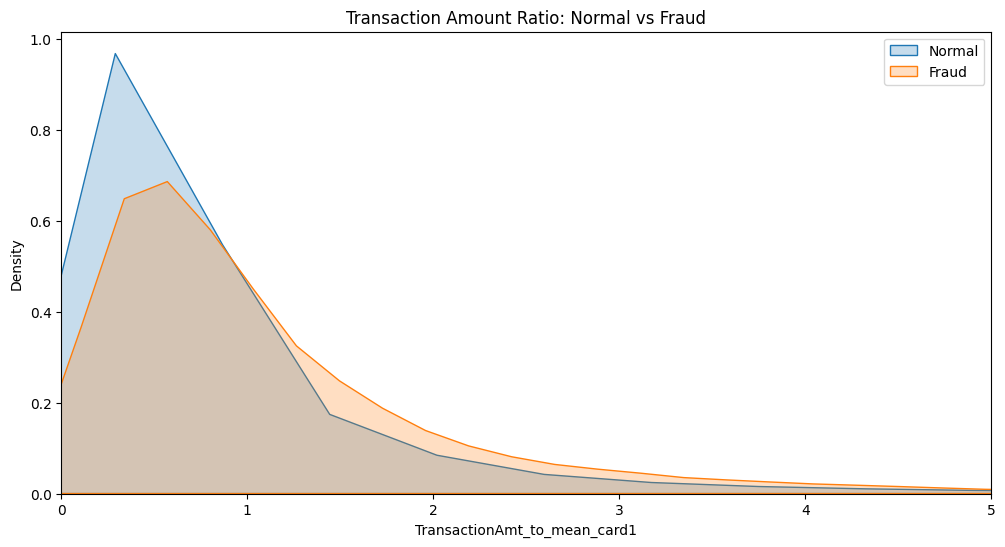

In [11]:
# Cell 2
plt.figure(figsize=(12, 6))
sns.kdeplot(train[train['isFraud'] == 0]['TransactionAmt_to_mean_card1'], label='Normal', fill=True)
sns.kdeplot(train[train['isFraud'] == 1]['TransactionAmt_to_mean_card1'], label='Fraud', fill=True)
plt.title('Transaction Amount Ratio: Normal vs Fraud')
plt.xlim(0, 5) # Focusing on the most relevant range
plt.legend()
plt.show()

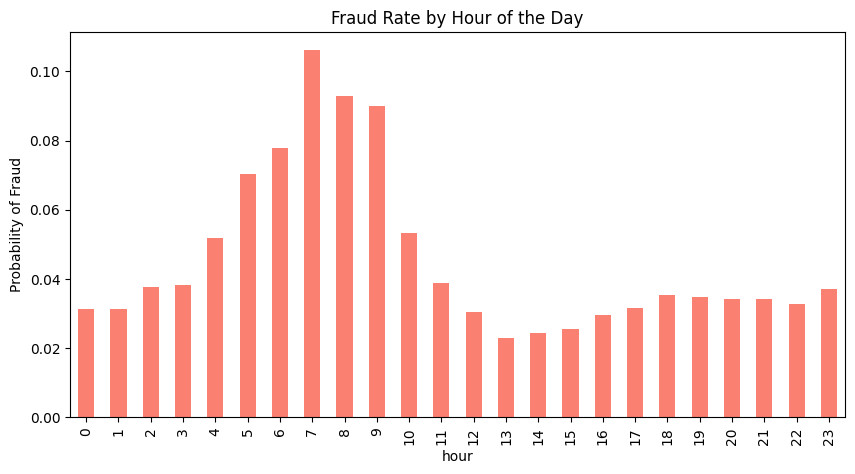

In [12]:
# Cell 3
# Group by hour and calculate fraud rate
hourly_fraud = train.groupby('hour')['isFraud'].mean()

plt.figure(figsize=(10, 5))
hourly_fraud.plot(kind='bar', color='salmon')
plt.title('Fraud Rate by Hour of the Day')
plt.ylabel('Probability of Fraud')
plt.show()

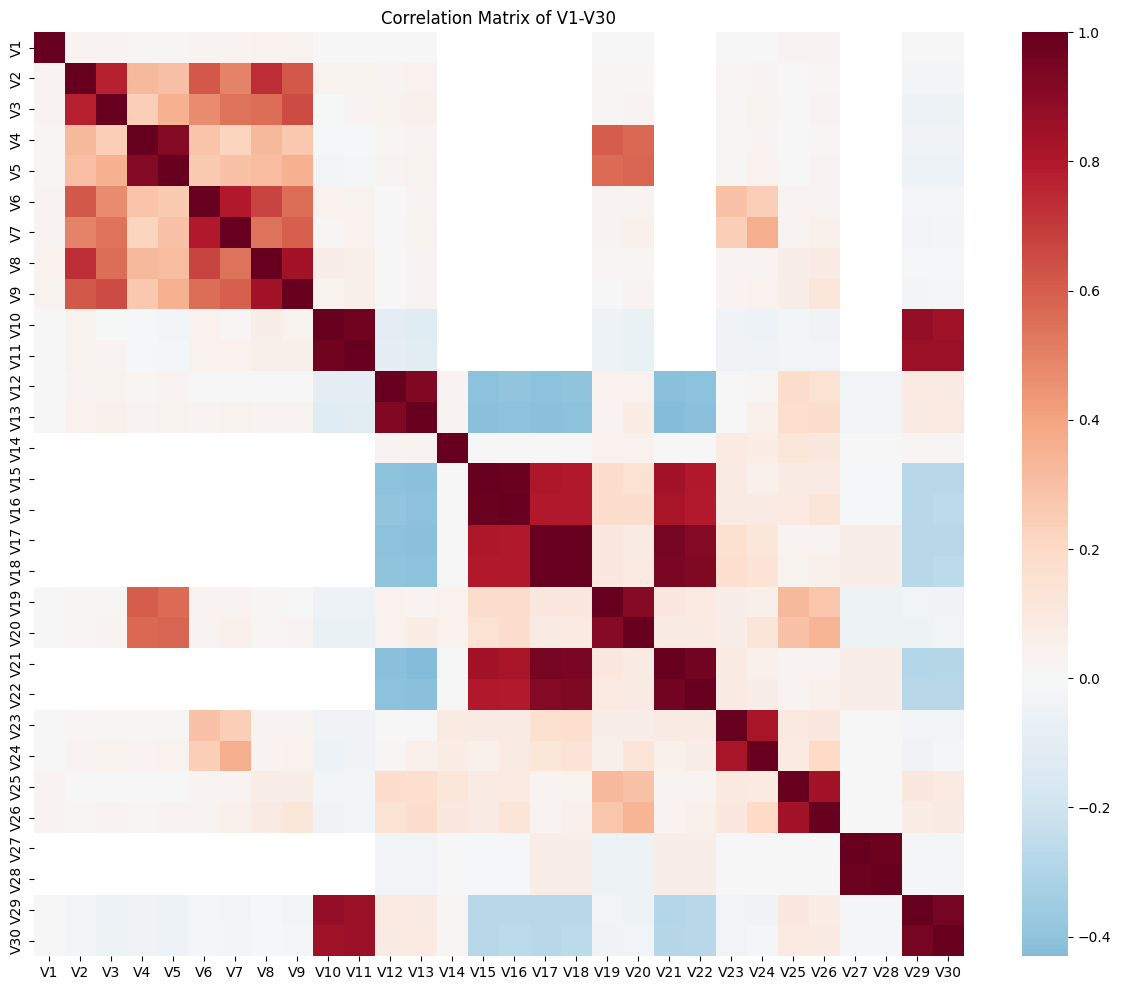

In [13]:
# Cell 4
# Selecting a subset of V columns for a heatmap
v_cols = [f'V{i}' for i in range(1, 31)] # First 30 V columns
plt.figure(figsize=(15, 12))
sns.heatmap(train[v_cols].corr(), cmap='RdBu_r', center=0)
plt.title('Correlation Matrix of V1-V30')
plt.show()

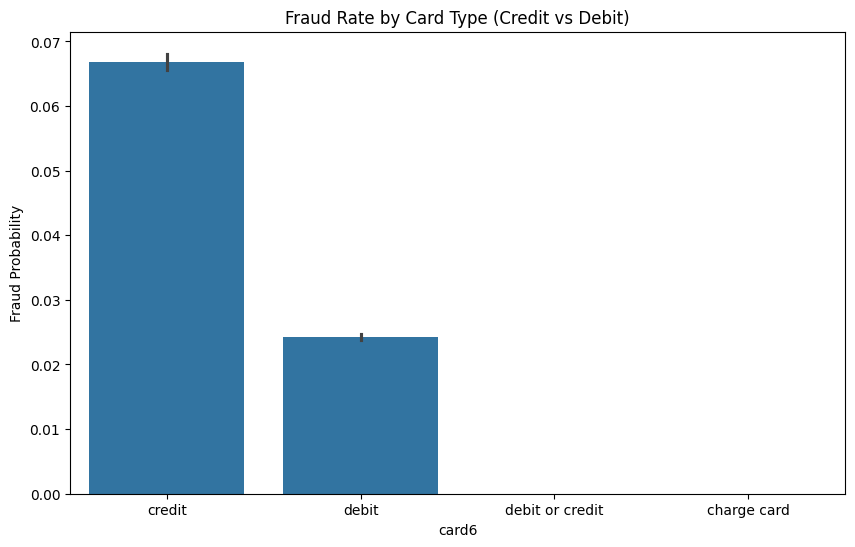

In [ ]:
# Cell 5
temp_df = pd.read_csv('../data/raw/train_transaction.csv', usecols=['card6', 'isFraud'])
plt.figure(figsize=(10, 6))
# card6 is typically Credit/Debit
sns.barplot(x='card6', y='isFraud', data=temp_df)
plt.title('Fraud Rate by Card Type (Credit vs Debit)')
plt.ylabel('Fraud Probability')
plt.show()

del temp_df
gc.collect()

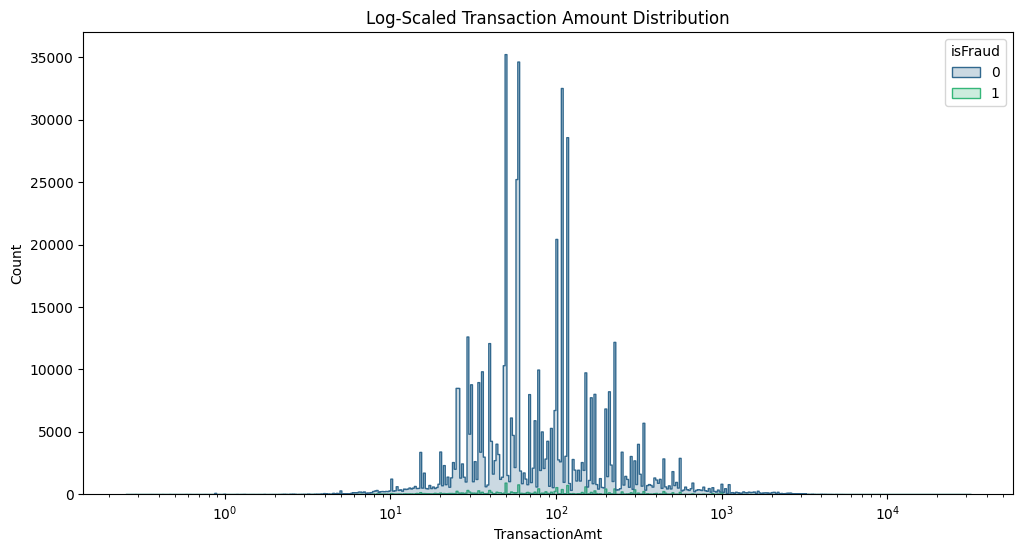

In [15]:
# Cell 6
plt.figure(figsize=(12, 6))
sns.histplot(train, x='TransactionAmt', hue='isFraud', element='step', palette='viridis', log_scale=True)
plt.title('Log-Scaled Transaction Amount Distribution')
plt.show()

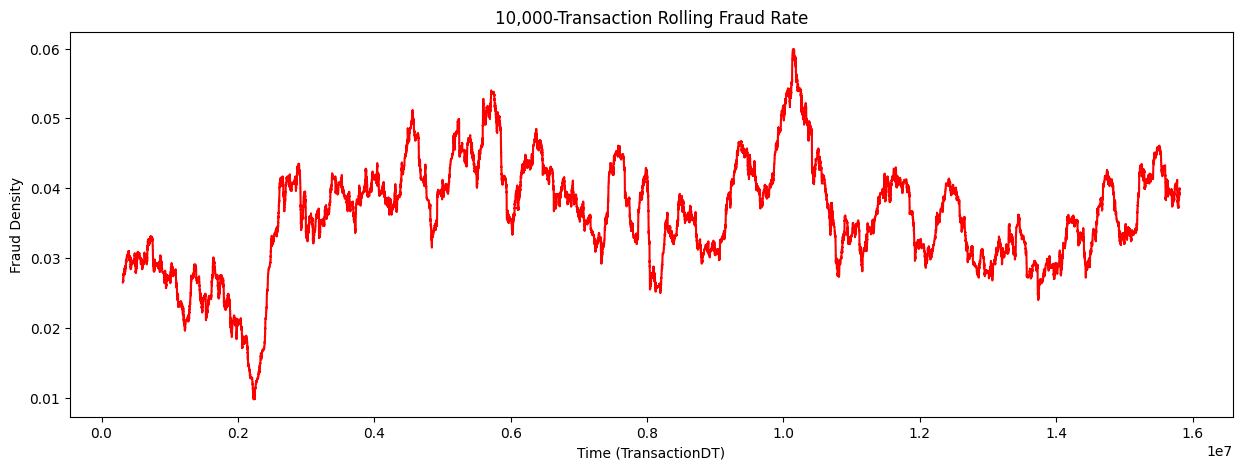

In [16]:
# Cell 7
# Rolling fraud rate over TransactionDT
train['rolling_fraud'] = train['isFraud'].rolling(window=10000).mean()
plt.figure(figsize=(15, 5))
plt.plot(train['TransactionDT'], train['rolling_fraud'], color='red')
plt.title('10,000-Transaction Rolling Fraud Rate')
plt.xlabel('Time (TransactionDT)')
plt.ylabel('Fraud Density')
plt.show()